In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import theano.tensor as tt
plt.style.use('seaborn-darkgrid')
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)


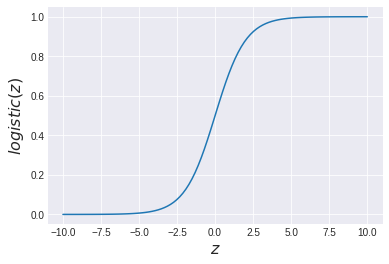

In [2]:
z = np.linspace(-10, 10, 100)
logistic = 1/(1 + np.exp(-z))
plt.plot(z, logistic)
plt.xlabel('$z$', fontsize=16)
plt.ylabel('$logistic(z)$', fontsize=16)
plt.savefig('img501.png')


In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


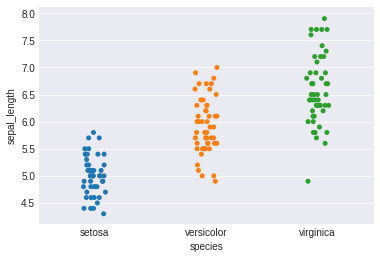

In [4]:
sns.stripplot(x='species', y= 'sepal_length', data=iris, jitter=True)

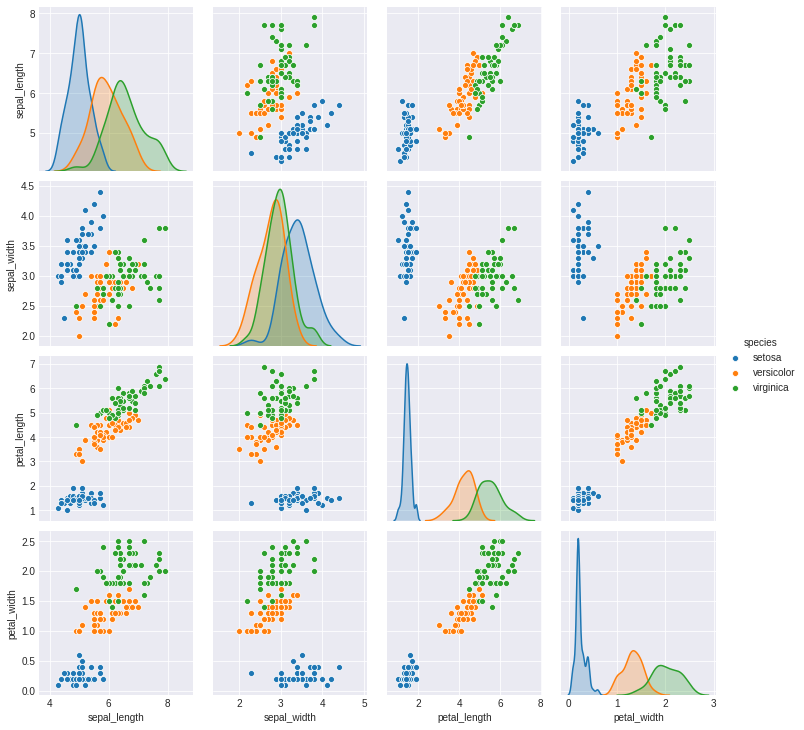

In [5]:
sns.pairplot(iris, hue='species', diag_kind='kde')

In [6]:
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values

In [7]:
x_0

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 16 seconds.
The acceptance probability does not match the target. It is 0.8893145018235297, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f52fd3d7290>,
      dtype=object)

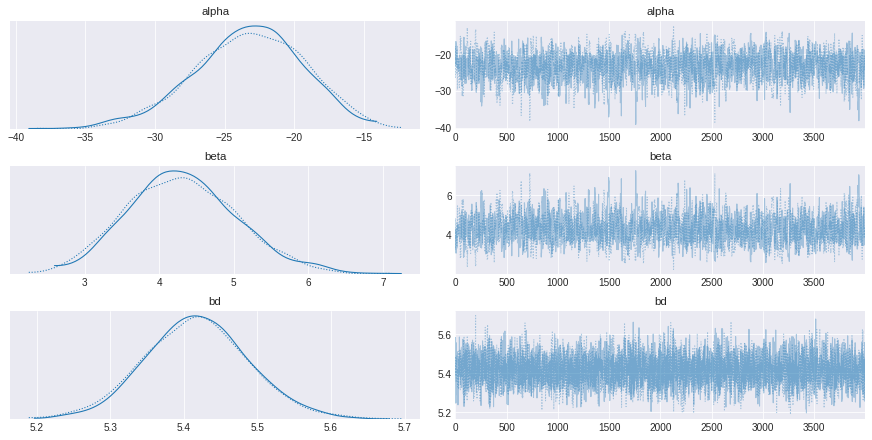

In [8]:
with pm.Model() as model_0:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    
    mu = alpha + pm.math.dot(x_0, beta)
    theta = pm.Deterministic('theta', 1/(1 + pm.math.exp(-mu)))
    bd = pm.Deterministic('bd', -alpha/beta)
    
    y1 = pm.Bernoulli('y1', p=theta, observed=y_0)
    trace_0 = pm.sample(5000)
    
chain_0 = trace_0[1000:]
varnames = ['alpha', 'beta', 'bd']
pm.traceplot(chain_0, varnames)

In [10]:
pm.summary(trace_0, varnames)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-23.37,4.05,-30.93,-15.73,1.16e-01,8.30e-02,1212.0,1206.0,1215.0,1429.0,1.0
beta,4.32,0.75,2.96,5.77,2.20e-02,1.50e-02,1216.0,1210.0,1217.0,1414.0,1.0
bd,5.42,0.07,5.29,5.55,1.00e-03,1.00e-03,7825.0,7822.0,7808.0,6568.0,1.0


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/arviz/stats/stats.py:338: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(("hpd will be deprecated " "Please replace hdi"),)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/arviz/data/base.py:146: UserWarning: More chains (8000) than draws (100). Passed array should have shape (chains, draws, *shape)
  UserWarning,


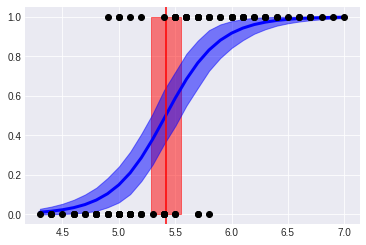

In [11]:
theta = chain_0['theta'].mean(axis=0)
idx = np.argsort(x_0)
plt.plot(x_0[idx], theta[idx], color='b', lw=3)
plt.axvline(chain_0['bd'].mean(), ymax=1, color='r')
bd_hpd = pm.hpd(chain_0['bd'])
plt.fill_betweenx([0,1], bd_hpd[0], bd_hpd[1], color='r', alpha=0.5)

plt.plot(x_0, y_0, 'o', color='k')
theta_hpd = pm.hpd(chain_0['theta'])[idx]
plt.fill_between(x_0[idx], theta_hpd[:,0],theta_hpd[:,1], color='b', alpha=0.5)